<div align=center>
		
<p></p>
<p></p>
<font size=5>
In the Name of God
<font/>
<p></p>
 <br/>
    <br/>
    <br/>
<font color=#FF7500>
Sharif University of Technology - Departmenet of Computer Engineering
</font>
<p></p>
<font color=blue>
Artifical Intelligence - Prof. Rohban, Prof. Soleymani
</font>
<br/>
<br/>

Fall 2023

</div>

<hr/>
		<div align=center>
		    <font color=red size=6>
			    <br />
Practical Assignment 5
            	<br/>
			</font>
    <br/>
    <br/>
<font size=4>
			<br/><br/>
Deadline:  2 Mehr 
                <br/><b>
                <br>
              Cheating is Strongly Prohibited
                </b><br/><br/>
                <font color=red>
Please run all the cells.
     </font>
</font>
                <br/>
    </div>

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
rng = np.random.default_rng(42)

# Question 1: Polynomial Regresrion Implementation (30 points)

In the following section, you will implement a class that performs Polynomial Regression. Follow instructions in the methods' body. Note that your input and output shapes must be the same as instructions.
$$\hat{y} = a_nx^n + \dots + a_1x + a_0$$

In [2]:
class PolynomialRegression:
    """
        The class of polynomial regression.
    """
    def __init__(self, degree):
        """
          initialize parameters you need.
        """
        self.degree = degree
    def PolynomialFeature(X, degree):
        """
          X of the shape (m, 1)
          returns an array A=(a_{ij}) of the shape (m, degree) such that a_{ij} = X_i^j
        """
        assert X.ndim == 2, 'X must be two-dimensional!'
        assert X.shape[-1] == 1, 'X must be of the shape (m, 1)'
        return np.hstack([X ** j for j in range(1, degree+1)])

    def LinearRegression(X, Y):
        """
          X of the shape (m, n)
          y of the shape (m,)
          returns coefficients of linear regression of the shape (n+1,) (extra coefficient for bias term)
        """
        assert X.ndim == 2, 'X must be two-dimensional!'
        assert Y.ndim == 1, 'Y must be two-dimensional!'
        assert X.shape[0] == Y.shape[0], 'Size of X and Y do not match.'
        n = X.shape[-1]
        return np.linalg.lstsq(np.insert(X, n, 1, 1), Y, rcond=False)[0]
    def fit(self, X, Y):
        """
          X of the shape (m, n)
          y of the shape (m,)
          returns None
        """
        self.param = PolynomialRegression.LinearRegression(PolynomialRegression.PolynomialFeature(X, self.degree), Y)
    def predict(self, X):
        """
          X of the shape (m, 1)
          returns an array of the shape (m,)
        """
        assert X.ndim == 2, 'X must be two-dimensional!'
        assert X.shape[-1] == 1, 'X must be of the shape (m, 1)'
        return np.dot(PolynomialRegression.PolynomialFeature(X, self.degree), self.param[:-1]) + self.param[-1]

# Question 2: Regressing a Sine Function in Polyomial Functions (20 points)

Consider the underlying function $f^*(X) = \sin(X)$. Generate 15 datasets with 5, 10, 15, 25, and 50 i.i.d samples from the following distribution: (three datasets with each size)
$$
X \sim \text{uniform}(0, 2\pi) \\
Y | X \sim \text{N}(f^*(X), \sigma^2) \\
\text{where } \sigma = .5
$$
Assume we want to train models of degrees 1, 3, 8, 12, and 15 on these datasets. Generate a $5\times 5$ grid of plots. Assume that rows correspond to the dataset size and columns correspond to the degree of model. In each plot, plot the result hypothesis functions from training the corresponding model on the corresponding datasets. In addition plot the underlying function.

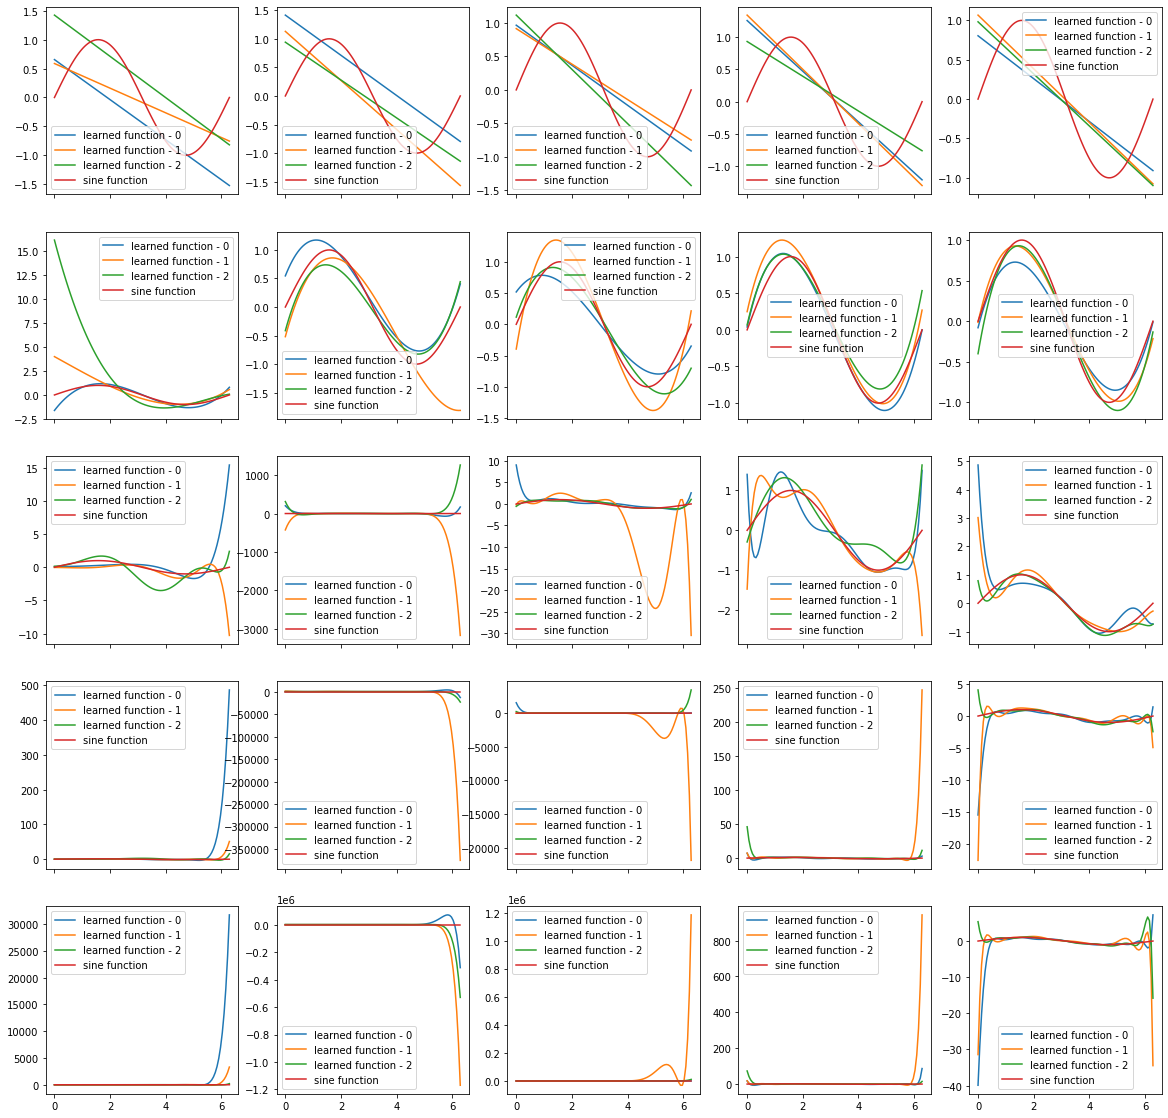

In [3]:
fig, ax = plt.subplots(5, 5, sharex=True, gridspec_kw=dict(hspace=.2, wspace=.2), figsize=(20, 20))
t = np.linspace(0, 2*np.pi, 100)
s = np.sin(t)
datasets = []
for samples in [5, 10, 15, 25, 50]:
    of_this_size = []
    for _ in range(3):
        X = rng.uniform(0, 2*np.pi, samples)
        Y = rng.normal(np.sin(X), scale=.5)
        of_this_size.append((X, Y))
    datasets.append(of_this_size)
for i, degree in enumerate([1, 3, 8, 12, 15]):
    for j, of_this_size in enumerate(datasets):
        for k, (X, Y) in enumerate(of_this_size):
            model = PolynomialRegression(degree)
            model.fit(X[:, np.newaxis], Y)
            ax[i, j].plot(t, model.predict(t[:, np.newaxis]), label=f'learned function - {k}')
        ax[i, j].plot(t, s, label='sine function')
        ax[i, j].legend(loc='best')

Which models are more sensitive to the "noise"? (i.e. If you sample many datasets with the same size and from the same distributions, the trained models on these datasets are very different.) How does the performance of each model change as the number of training samples increase? Does the performace of the linear model improve as the number of samples increase? How about the model of degree 15?

# Question 3: Estimating Bias-Variance Trade-off and Drawing Heatmaps (70 points)

## Estmate Bias-Variance Trade-off (50 points)

In this section, you will approximate bias and variance in different classes of polynomial regression models and then find relations between these quantities and n_train_samples and degree.

In [4]:
def bias_variance_estimation(degree, n_train_samples, n_trials=100):
    """
    This function estimates bias and variance of the hypothesis space of polynomials of degree at most d.
    You must perform n_trials, each consists of generating a training set of n_train_samples samples.
    Then you can compute the mean hypothesis and compute bias and variance.
    """
    # generate n_trials datasets each with n_train_samples

    datasets = []
    for _ in range(n_trials):
        X = rng.uniform(0, 2*np.pi, n_train_samples)
        Y = rng.normal(np.sin(X), scale=.5)
        datasets.append((X[:, np.newaxis], Y))

    # train n_trials models
    model = PolynomialRegression(degree)
    samples = rng.uniform(0, 2*np.pi, 100)[:, np.newaxis]
    preds = []
    params = []
    for X, Y in datasets:
        model.fit(X, Y)
        params.append(model.param)
        preds.append(model.predict(samples))
    preds = np.vstack(preds)
    params = np.vstack(params)
    assert preds.shape == (n_trials, 100)
    assert params.shape == (n_trials, degree+1)
    # estimate bias and variance
    variance = np.mean(np.var(preds, axis=0))
    avg_model = PolynomialRegression(degree)
    avg_model.param = np.mean(params, axis=0)
    bias = np.sqrt(np.mean((avg_model.predict(samples) - np.sin(samples))**2))
    return bias, variance

## Drawing Heatmaps (20 points)

Now, estimate bias and variance for a model of degree $d$ trained on $n$ samples for values of $d$ and $n$ in the previous section. Then show the results for bias and variance separately as heat maps. (If values of bias and variance are very large, you can use a logarithmic scale.)

In [5]:
biases = np.empty((5, 5))
variances = np.empty((5, 5))
for i, degree in enumerate([1, 3, 8, 12, 15]):
    for j, samples in enumerate([5, 10, 15, 25, 50]):
        biases[i, j], variances[i, j] = bias_variance_estimation(degree, samples)

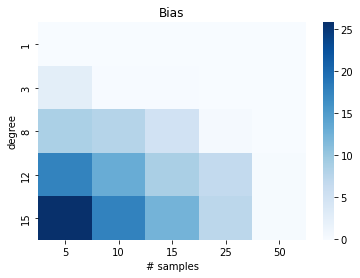

In [6]:
sns.heatmap(np.log(biases), cmap='Blues', xticklabels=[5, 10, 15, 25, 50], yticklabels=[1, 3, 8, 12, 15])
plt.title('Bias')
plt.xlabel('# samples')
plt.ylabel('degree');

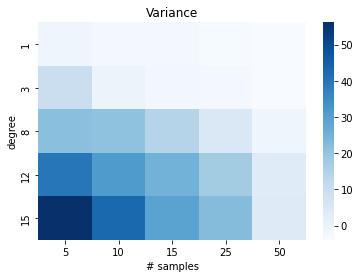

In [7]:
sns.heatmap(np.log(variances), cmap='Blues', xticklabels=[5, 10, 15, 25, 50], yticklabels=[1, 3, 8, 12, 15])
plt.title('Variance')
plt.xlabel('# samples')
plt.ylabel('degree');

Fixing the `degree`, how does bias (or variance) change as the `n_train_samples` increase? Similarly, fixing the `n_train_samples`, how does bias (or variance) change as the `degree` increase? Assume that you have a large dataset. Do you prefer to use a "complex" model or a "simple" model? Why?